In [13]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [14]:
heart_data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [15]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [18]:
print("shape of data set :",heart_data.shape)

shape of data set : (299, 13)


In [19]:
#feature extraction
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [20]:
feature= XGBClassifier()

In [21]:
x=heart_data.drop(['DEATH_EVENT'],axis=1)
y=heart_data['DEATH_EVENT']

In [22]:
feature=XGBClassifier()

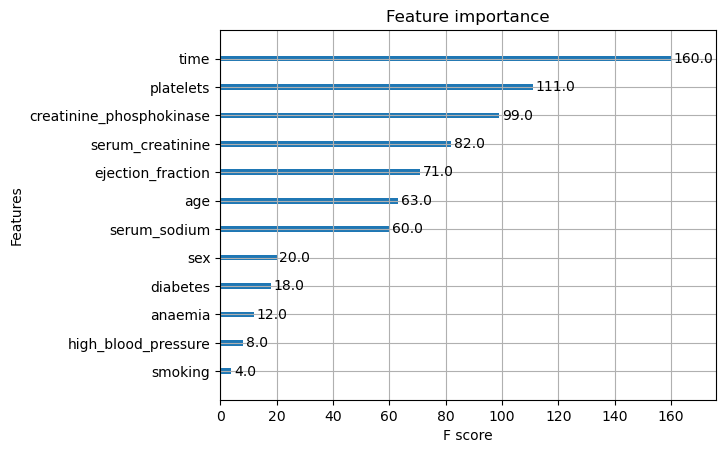

In [24]:
feature.fit(x,y)
plot_importance(feature)
pyplot.show()

# Data modeling


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, recall_score

In [26]:
Feature=['time','ejection_fraction','serum_creatinine']
x=heart_data[Feature]
y=heart_data["DEATH_EVENT"]
print(x)

     time  ejection_fraction  serum_creatinine
0       4                 20               1.9
1       6                 38               1.1
2       7                 20               1.3
3       7                 20               1.9
4       8                 20               2.7
..    ...                ...               ...
294   270                 38               1.1
295   271                 38               1.2
296   278                 60               0.8
297   280                 38               1.4
298   285                 45               1.6

[299 rows x 3 columns]


In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
import joblib

In [36]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

knn_pred=knn.predict(xtest)
knn_accu=accuracy_score(ytest,knn_pred)
knn_pre=precision_score(ytest,knn_pred)
knn_recall=recall_score(ytest, knn_pred)
knn_con=confusion_matrix(ytest, knn_pred)
print("accuracy rate for knn:", knn_accu)
print("precision_score for knn:", knn_pre)
print("recall score for knn:", knn_recall)
print("confusion_matrix for knn:\n", knn_con)

accuracy rate for knn: 0.9166666666666666
precision_score for knn: 0.9285714285714286
recall score for knn: 0.7647058823529411
confusion_matrix for knn:
 [[42  1]
 [ 4 13]]
